# 1. Imports

In [112]:
import pandas as pd
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import time
import copy

# 2. Load data

In [100]:
data = load_iris() #using sklearn's iris data, should be similar if not the same as the one in the project, change to loading processed data later
X = data.data
y = data.target

# 3. Define parameteres to cross validate

In [3]:
#most parameters are random for now, just to check how it works
param_grid = {
    'criterion': np.array(['gini', 'entropy']),
    'max_depth': np.arange(1, 11, 1),
    'splitter': np.array(['best', 'random']),
    'min_samples_split': np.array([2, 5, 10]),
    'min_samples_leaf': np.arange(1,10,2),
    'min_weight_fraction_leaf': np.arange(0.0, 0.5, 0.1),
    'max_features': np.array(['sqrt', 'log2']),
    'max_leaf_nodes': np.arange(2, 11, 2),
    'min_impurity_decrease': np.array([0.0, 0.1, 0.2]),
    'ccp_alpha': np.arange(0.0, 0.5, 0.1)
}

clf = DecisionTreeClassifier(random_state=42)

# 4. CV, train and get results

In [4]:
start_time = time.time()
grid_search = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid_search.fit(X, y)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

means = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']

Elapsed time: 2692.469239473343 seconds


#### This might take a while and make for mess in graphs later, if you want the easy way you can make a grid with only 2 pairs e.g.:
parm_gird = {
    'criterion': np.array(['gini', 'entropy']),
    'max_depth': np.array(range(1, 9, 1))
    }
#### run it for that grid only and once you get resuts, graphs and optimal parameters change it to:
parm_gird = {
    'criterion': optimal parameter,
    'max_depth': optimal parameter,
    'splitter': np.array(['best', 'random']),
    'min_samples_split': np.array([2, 5, 10])
    }
#### and run graph only for each pair 

# 5. Save to pandas df and show optimal parameters

In [5]:
results_df = pd.DataFrame(params)
results_df['accuracy'] = means

In [101]:
results_df.head(-1) #just to see how much we generated

ccp_alpha criterion  max_depth max_features  max_leaf_nodes  \
0             0.0      gini          1         sqrt               2   
1             0.0      gini          1         sqrt               2   
2             0.0      gini          1         sqrt               2   
3             0.0      gini          1         sqrt               2   
4             0.0      gini          1         sqrt               2   
...           ...       ...        ...          ...             ...   
449994        0.4   entropy         10         log2              10   
449995        0.4   entropy         10         log2              10   
449996        0.4   entropy         10         log2              10   
449997        0.4   entropy         10         log2              10   
449998        0.4   entropy         10         log2              10   

        min_impurity_decrease  min_samples_leaf  min_samples_split  \
0                         0.0                 1                  2   
1                         0.0                 1                  2   
2                         0.0                 1                  2   
3                         0.0                 1                  2   
4                         0.0                 1                  2   
...                       ...               ...                ...   
449994                    0.2                 9                 10   
449995                    0.2                 9                 10   
449996                    0.2                 9                 10   
449997                    0.2                 9                 10   
449998                    0.2                 9                 10   

        min_weight_fraction_leaf splitter  accuracy  
0                            0.0     best  0.666667  
1                            0.0   random  0.660000  
2                            0.1     best  0.666667  
3                            0.1   random  0.660000  
4                            0.2     best  0.666667  
...                          ...      ...       ...  
449994                       0.2     best  0.953333  
449995                       0.2   random  0.660000  
449996                       0.3     best  0.953333  
449997                       0.3   random  0.660000  
449998                       0.4     best  0.666667  

[449999 rows x 11 columns]

In [102]:
best_params = grid_search.best_params_
print("Optimal Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")


Optimal Parameters:
ccp_alpha: 0.0
criterion: gini
max_depth: 4
max_features: sqrt
max_leaf_nodes: 6
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 10
min_weight_fraction_leaf: 0.0
splitter: best


In [103]:
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

results = grid_search.cv_results_
worst_index = np.argmin(results['mean_test_score'])
worst_params = results['params'][worst_index]
worst_score = results['mean_test_score'][worst_index]

print("Worst parameters:", worst_params)
print("Worst accuracy:", worst_score)

Best parameters: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
Best accuracy: 0.9666666666666666
Worst parameters: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.4, 'splitter': 'random'}
Worst accuracy: 0.33333333333333337


In [104]:
bestacc_df = results_df[results_df['accuracy'] == grid_search.best_score_]
bestacc_df.head(-10)

ccp_alpha criterion  max_depth max_features  max_leaf_nodes  \
14420        0.0      gini          4         sqrt               6   
14870        0.0      gini          4         sqrt               8   
15320        0.0      gini          4         sqrt              10   
16670        0.0      gini          4         log2               6   
17120        0.0      gini          4         log2               8   
17570        0.0      gini          4         log2              10   
18920        0.0      gini          5         sqrt               6   
19350        0.0      gini          5         sqrt               8   
19370        0.0      gini          5         sqrt               8   
19820        0.0      gini          5         sqrt              10   
21170        0.0      gini          5         log2               6   
21600        0.0      gini          5         log2               8   
21620        0.0      gini          5         log2               8   
22070        0.0      gini          5         log2              10   
23420        0.0      gini          6         sqrt               6   
23850        0.0      gini          6         sqrt               8   
23870        0.0      gini          6         sqrt               8   
24300        0.0      gini          6         sqrt              10   
24320        0.0      gini          6         sqrt              10   
25670        0.0      gini          6         log2               6   
26100        0.0      gini          6         log2               8   
26120        0.0      gini          6         log2               8   
26550        0.0      gini          6         log2              10   
26570        0.0      gini          6         log2              10   
27920        0.0      gini          7         sqrt               6   
28350        0.0      gini          7         sqrt               8   
28370        0.0      gini          7         sqrt               8   
28800        0.0      gini          7         sqrt              10   
28820        0.0      gini          7         sqrt              10   
30170        0.0      gini          7         log2               6   
30600        0.0      gini          7         log2               8   
30620        0.0      gini          7         log2               8   
31050        0.0      gini          7         log2              10   
31070        0.0      gini          7         log2              10   
32420        0.0      gini          8         sqrt               6   
32850        0.0      gini          8         sqrt               8   
32870        0.0      gini          8         sqrt               8   
33300        0.0      gini          8         sqrt              10   
33320        0.0      gini          8         sqrt              10   
34670        0.0      gini          8         log2               6   
35100        0.0      gini          8         log2               8   
35120        0.0      gini          8         log2               8   
35550        0.0      gini          8         log2              10   
35570        0.0      gini          8         log2              10   
36920        0.0      gini          9         sqrt               6   
37350        0.0      gini          9         sqrt               8   
37370        0.0      gini          9         sqrt               8   
37800        0.0      gini          9         sqrt              10   
37820        0.0      gini          9         sqrt              10   
39170        0.0      gini          9         log2               6   
39600        0.0      gini          9         log2               8   
39620        0.0      gini          9         log2               8   
40050        0.0      gini          9         log2              10   
40070        0.0      gini          9         log2              10   

       min_impurity_decrease  min_samples_leaf  min_samples_split  \
14420                    0.0                 1                 10   
14870             

In [40]:
results_df.to_csv('450k2.csv', index=False) #export this so it doesn't take another 40 minutes after, dont forget to change the name

# 6. Graphs and experiments

### 6.1) Criterion

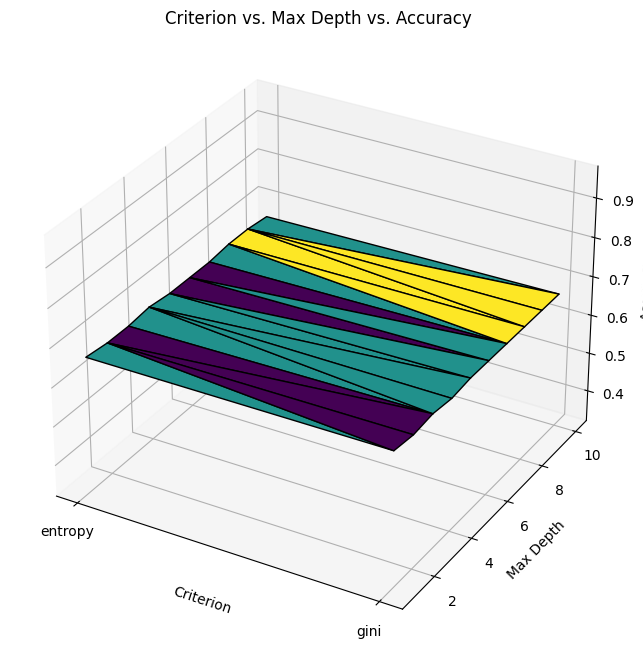

In [105]:
%matplotlib inline
#use auto for pop up
# Filter the results DataFrame to include only the desired meta-parameters
filtered_df = results_df.loc[:, ['accuracy', 'max_depth', 'criterion']].copy()

# Convert 'criterion' column to categorical data type
filtered_df['criterion'] = pd.Categorical(filtered_df['criterion'])

# Create a 3D surface plot for accuracy, max_depth, and criterion
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Prepare the data for the surface plot
x = filtered_df['criterion'].cat.codes
y = filtered_df['max_depth'].values
z = filtered_df['accuracy'].values

# Create the surface plot
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='black')

# Set the tick labels for the x-axis
ax.set_xticks(np.unique(x))
ax.set_xticklabels(filtered_df['criterion'].cat.categories)

# Set the labels and title
ax.set_xlabel('Criterion')
ax.set_ylabel('Max Depth')
ax.set_zlabel('Accuracy')
ax.set_title('Criterion vs. Max Depth vs. Accuracy')
# Show the plot
plt.show()


In [115]:
%matplotlib inline
filtered_df = results_df.loc[:, ['criterion', 'accuracy', 'max_depth', 'splitter', 'min_samples_split',
                                 'min_samples_leaf', 'min_weight_fraction_leaf', 'max_features',
                                 'max_leaf_nodes', 'min_impurity_decrease', 'ccp_alpha']].copy()

categorical_cols = ['criterion', 'splitter', 'max_features']
for col in categorical_cols:
    filtered_df[col] = filtered_df[col].astype('category')


parameters = ['max_depth', 'splitter', 'min_samples_split', 'min_samples_leaf',
              'min_weight_fraction_leaf', 'max_features', 'max_leaf_nodes',
              'min_impurity_decrease', 'ccp_alpha']
subparameters = copy.deepcopy(parameters)

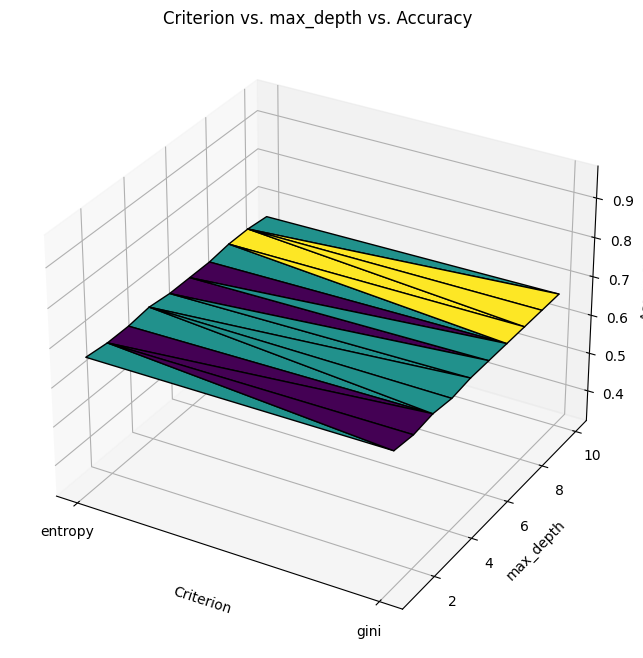

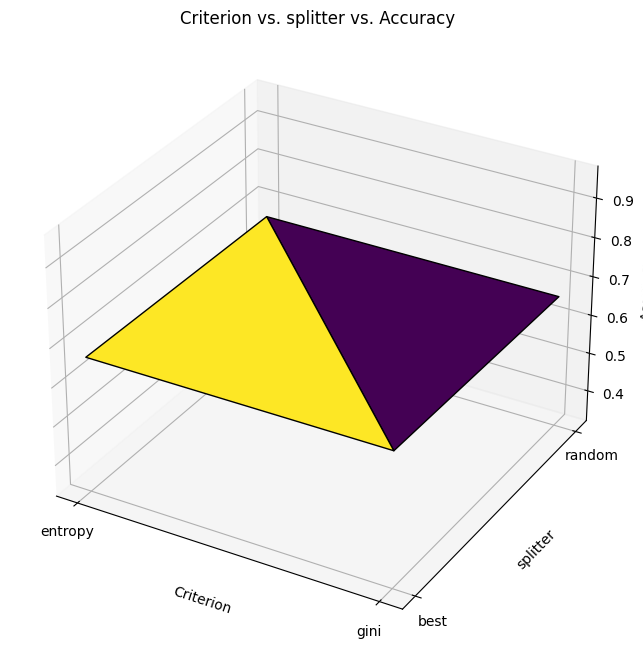

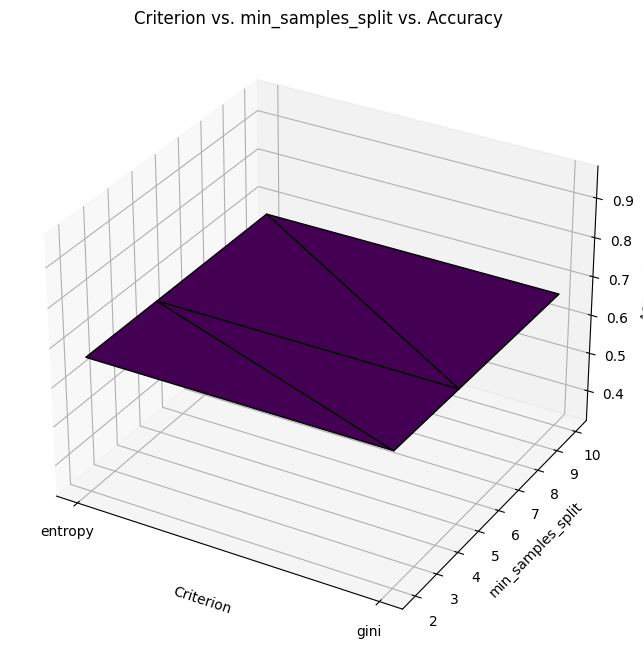

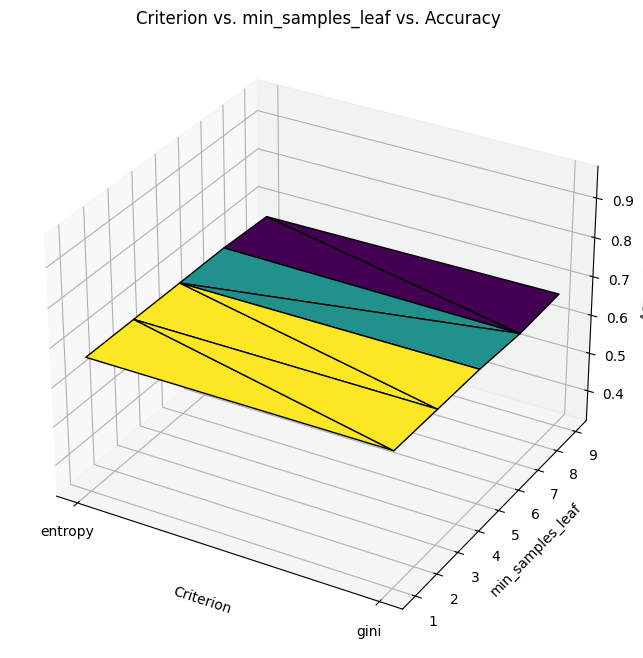

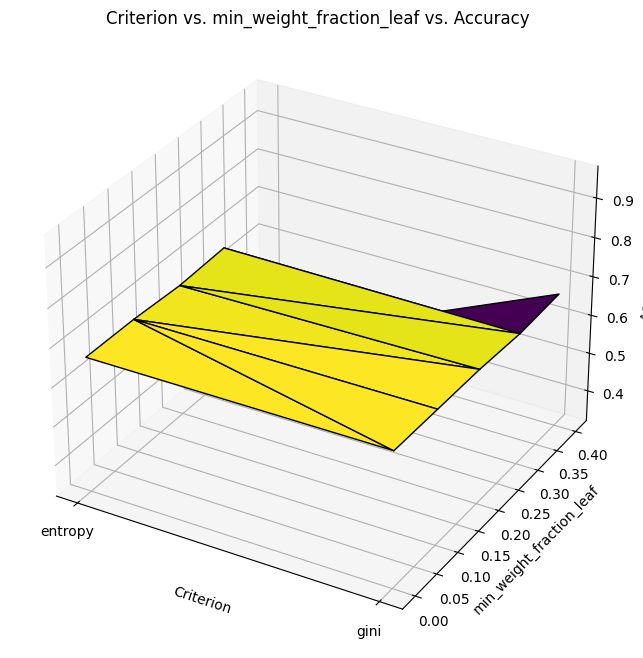

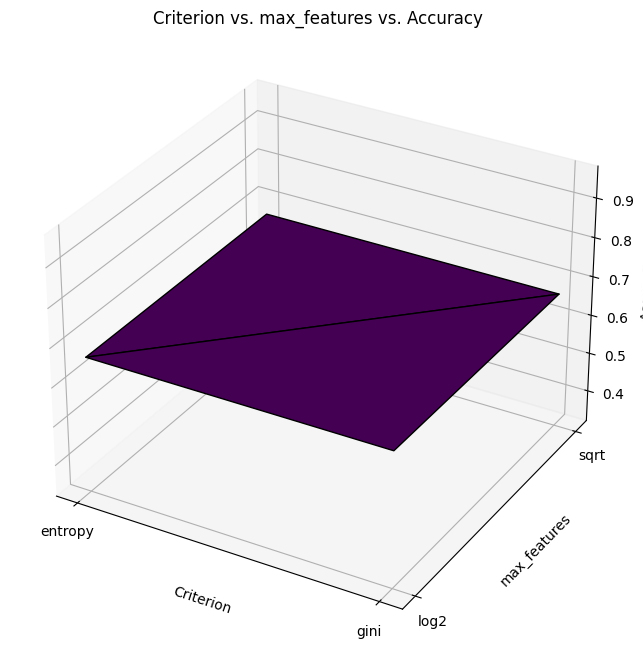

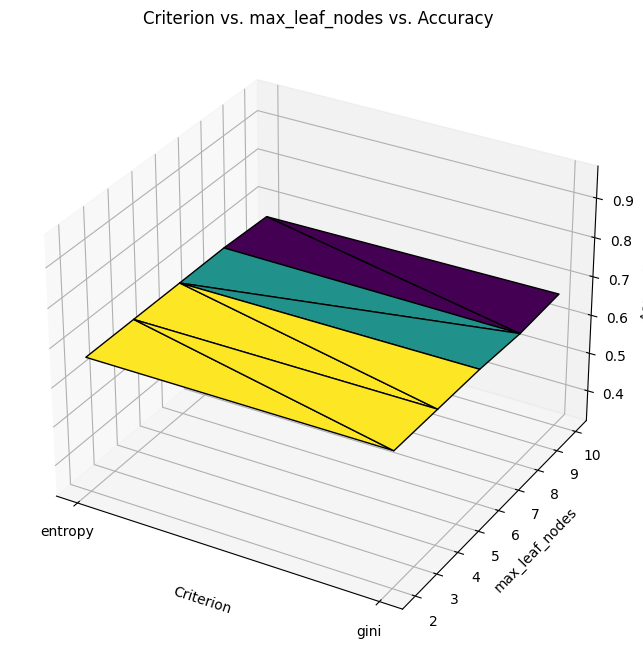

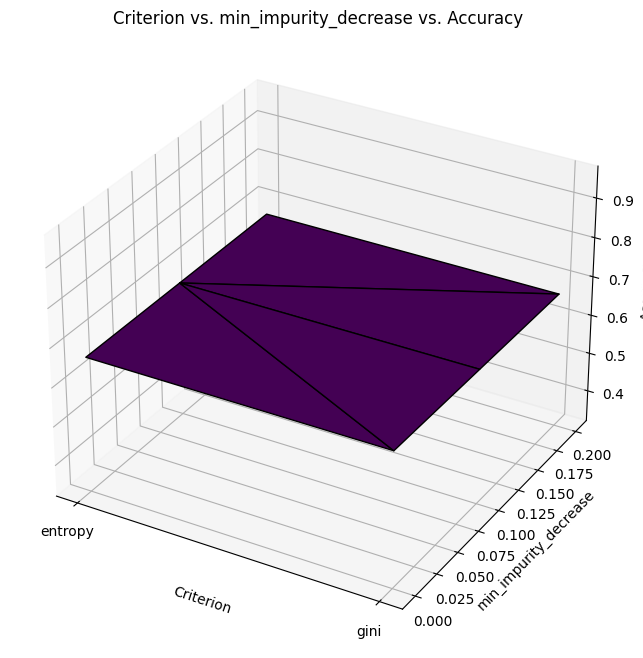

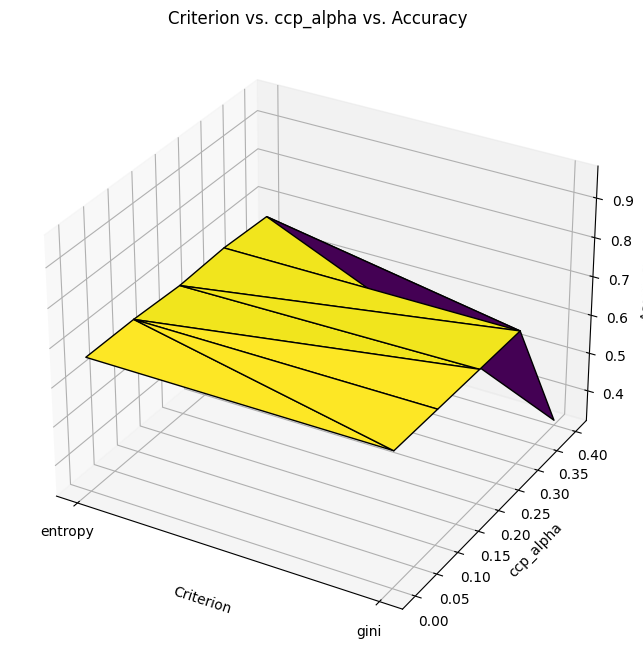

In [114]:
for parameter in parameters:
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Prepare the data for the surface plot
    x = filtered_df['criterion'].cat.codes
    if parameter in categorical_cols:
        y = filtered_df[parameter].cat.codes
        ax.set_yticks(np.unique(y))
        ax.set_yticklabels(filtered_df[parameter].cat.categories)
    else:
        y = filtered_df[parameter].values
    z = filtered_df['accuracy'].values

    # Create the surface plot
    ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='black')

    # Set the tick labels for the x-axis
    ax.set_xticks(np.unique(x))
    ax.set_xticklabels(filtered_df['criterion'].cat.categories)

    # Set the labels and title
    ax.set_xlabel('Criterion')
    ax.set_ylabel(parameter)
    ax.set_zlabel('Accuracy')
    ax.set_title(f'Criterion vs. {parameter} vs. Accuracy')
    # Show the plot
    plt.show()
    

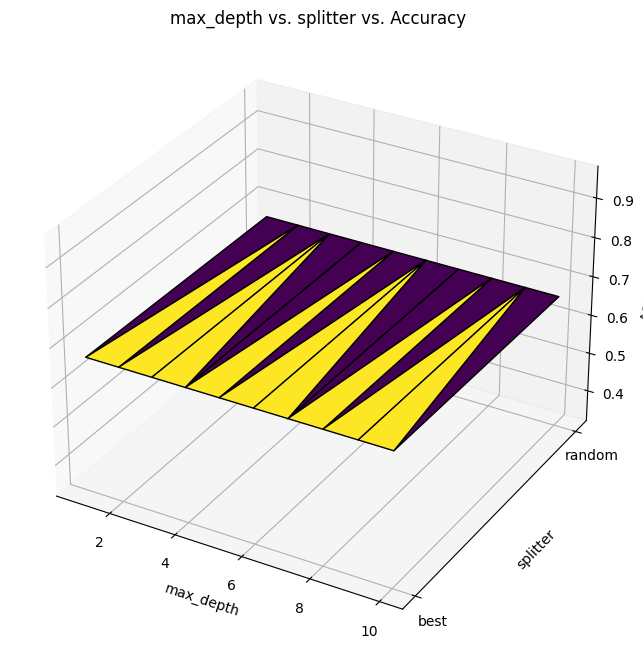

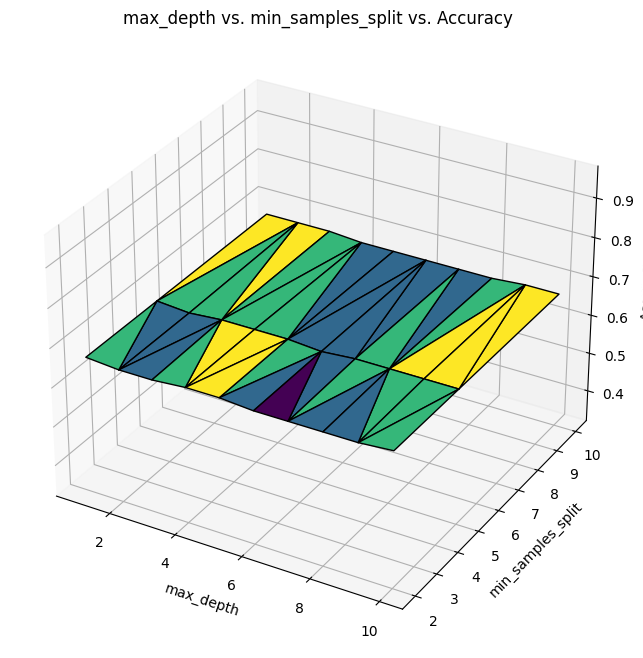

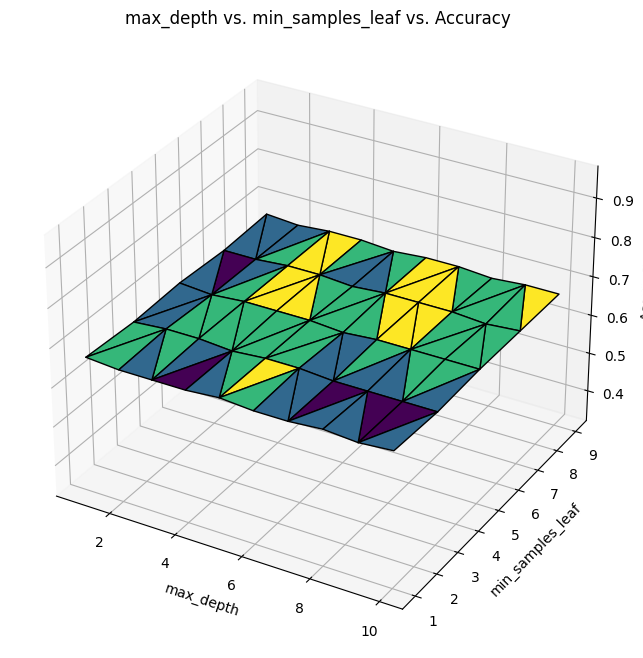

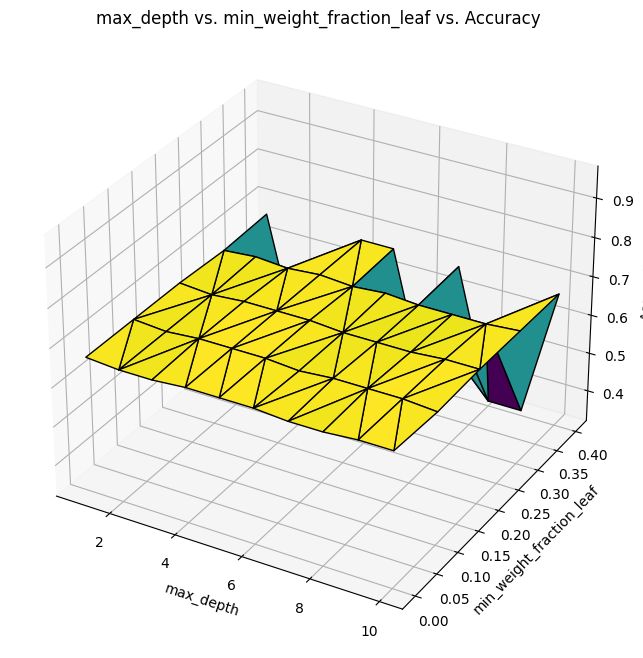

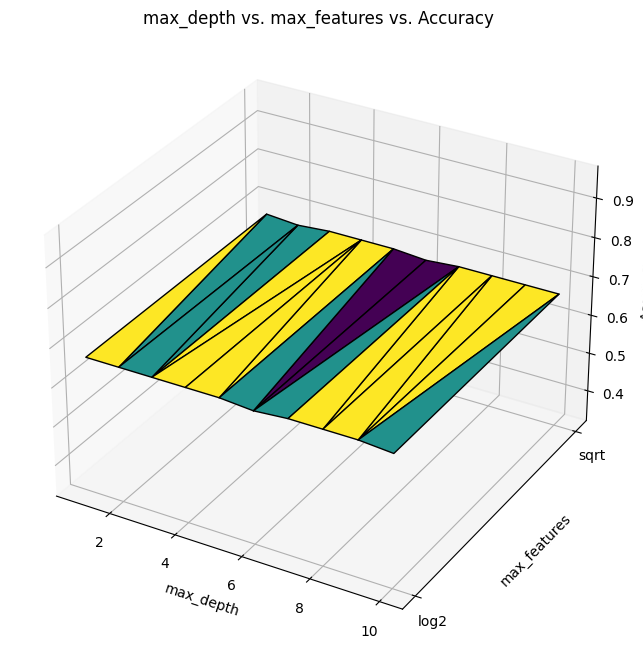

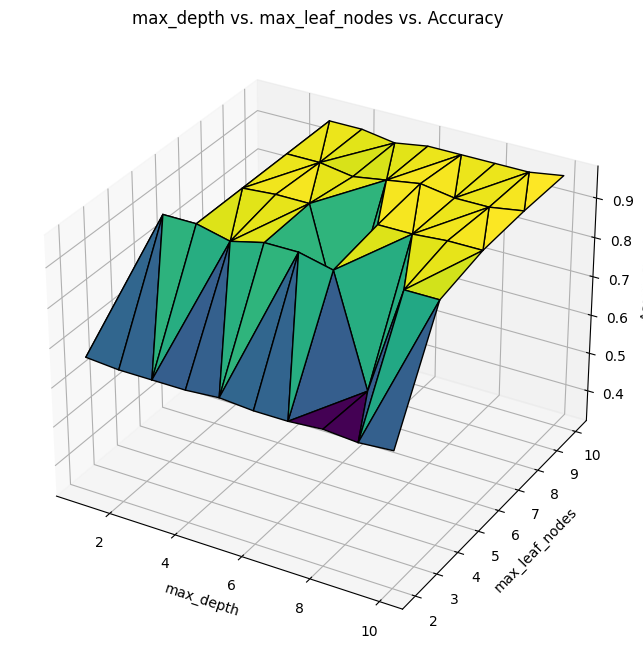

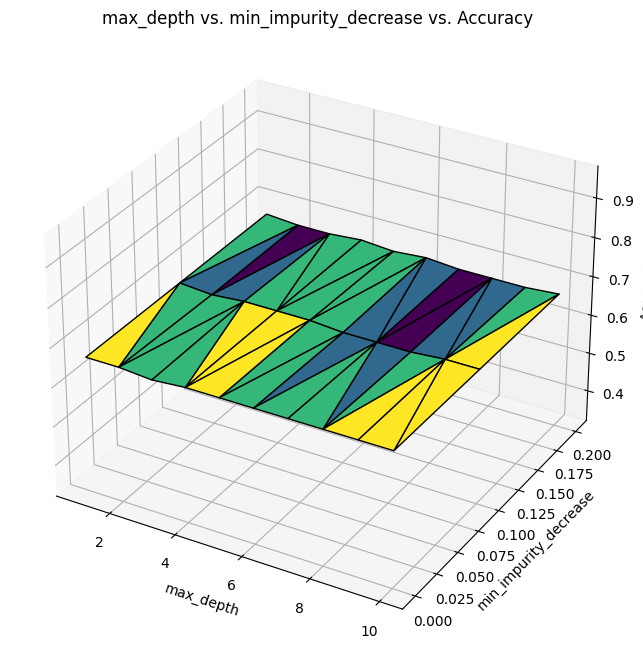

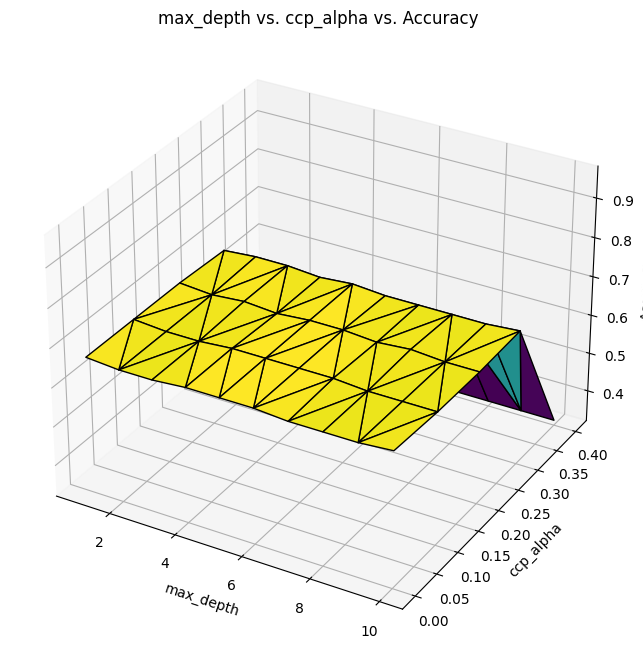

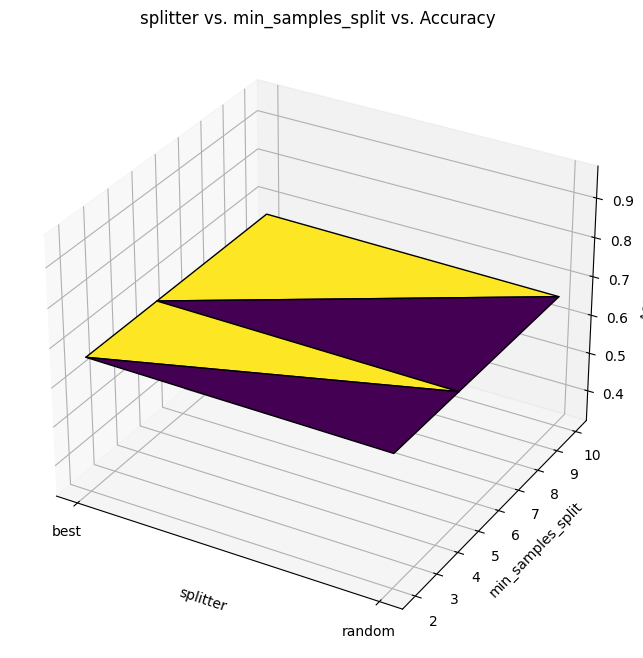

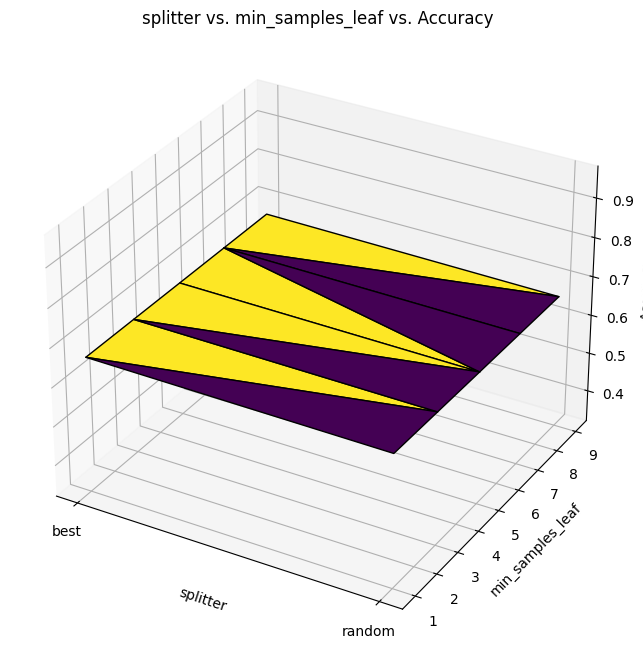

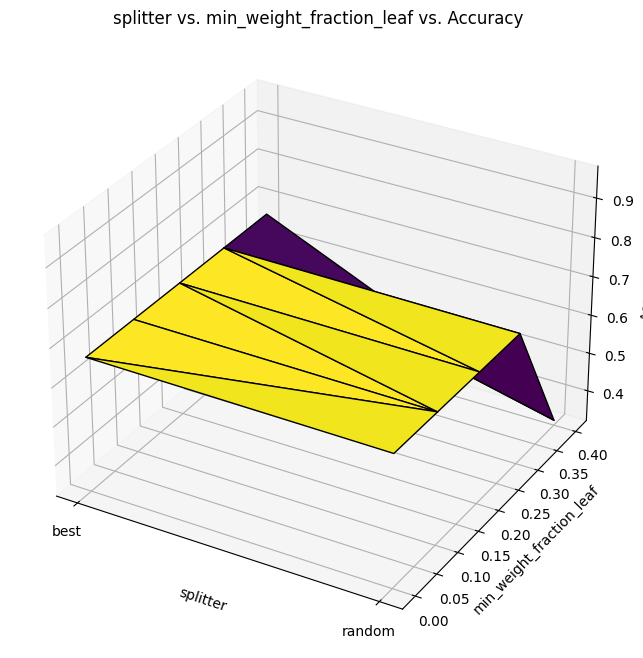

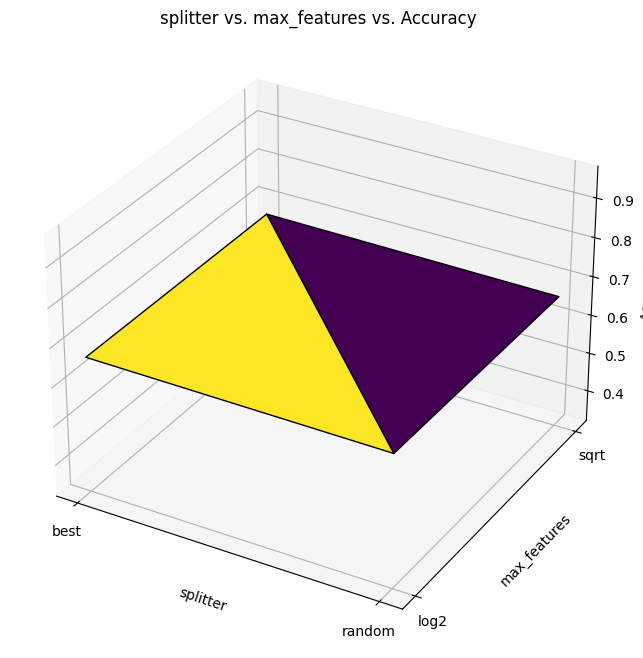

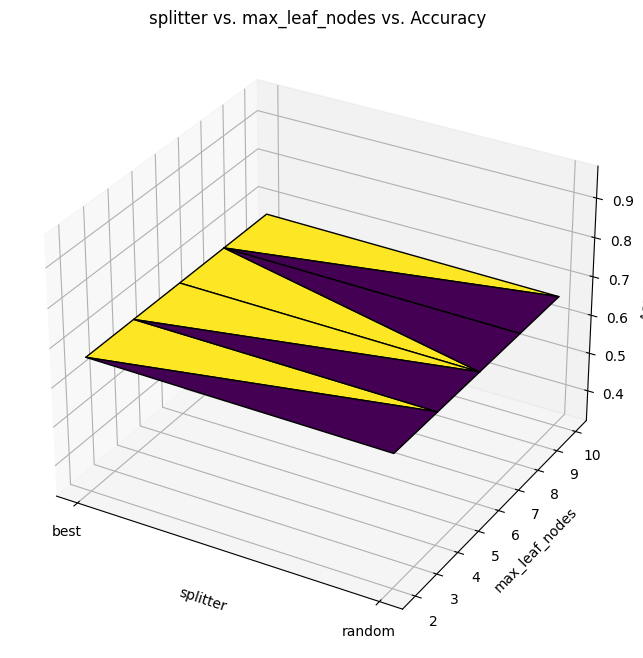

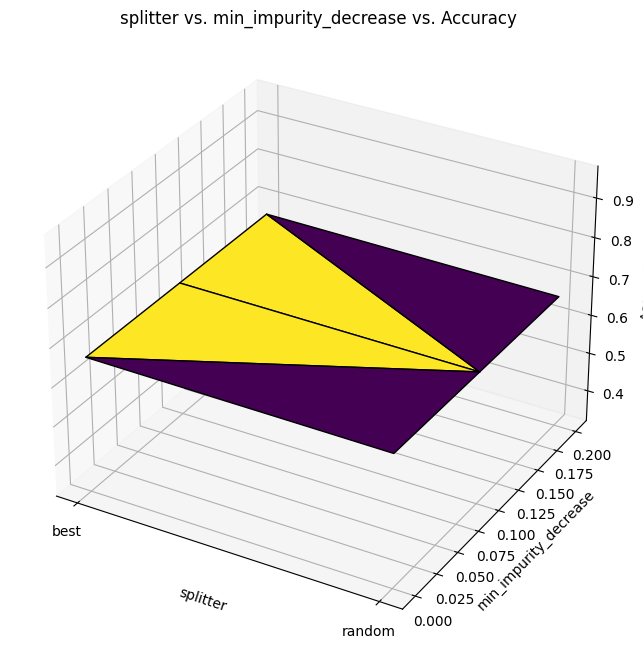

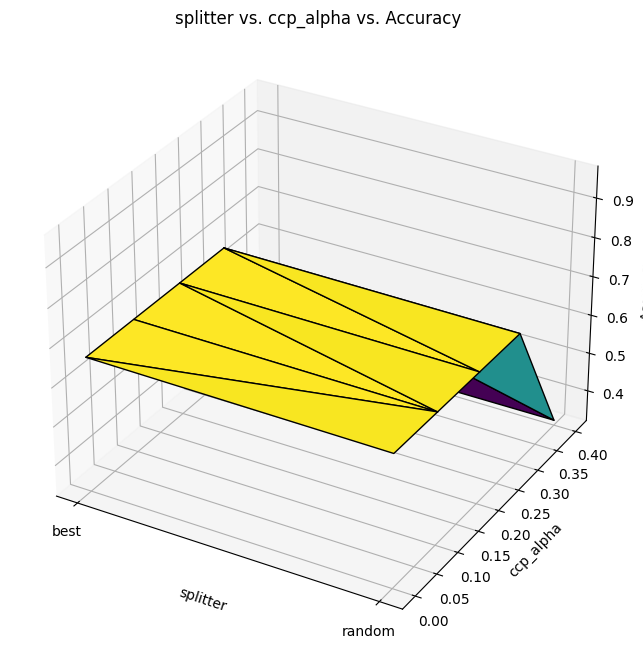

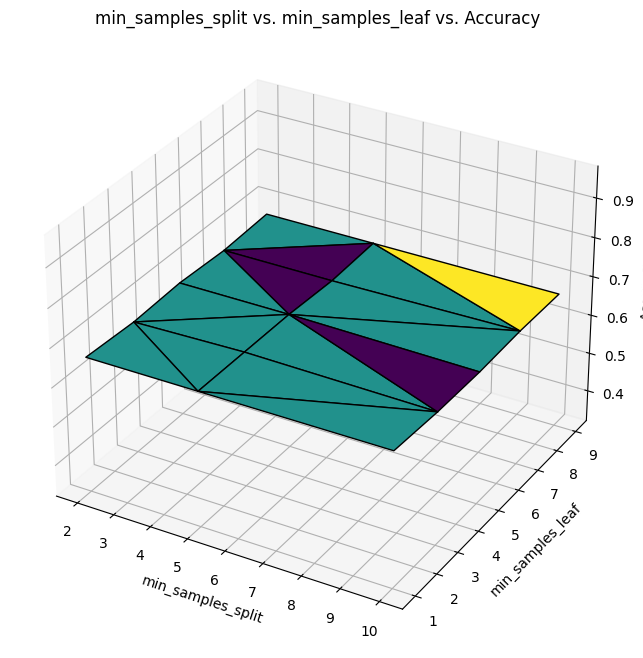

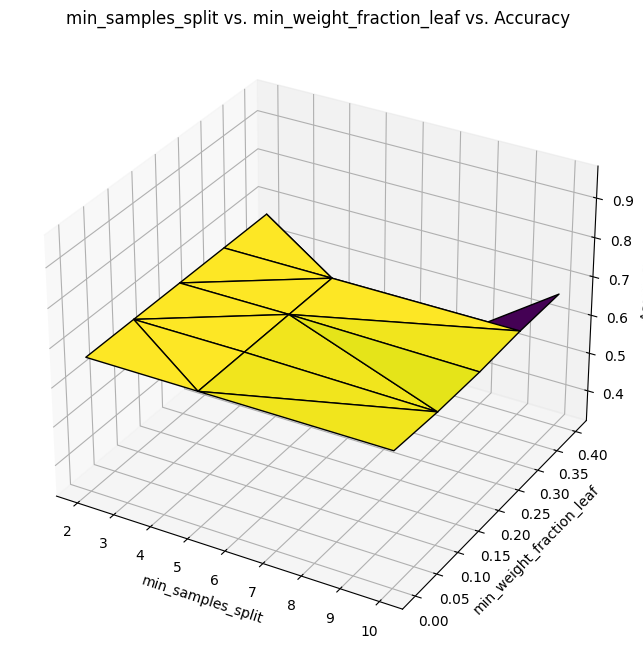

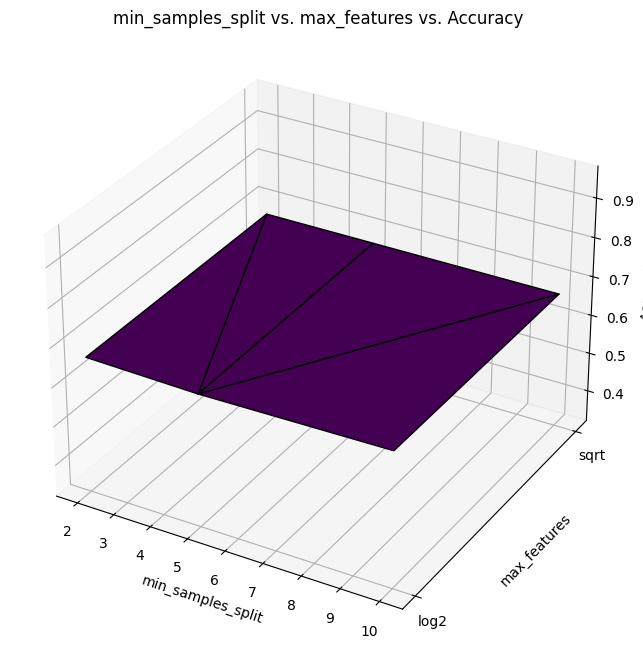

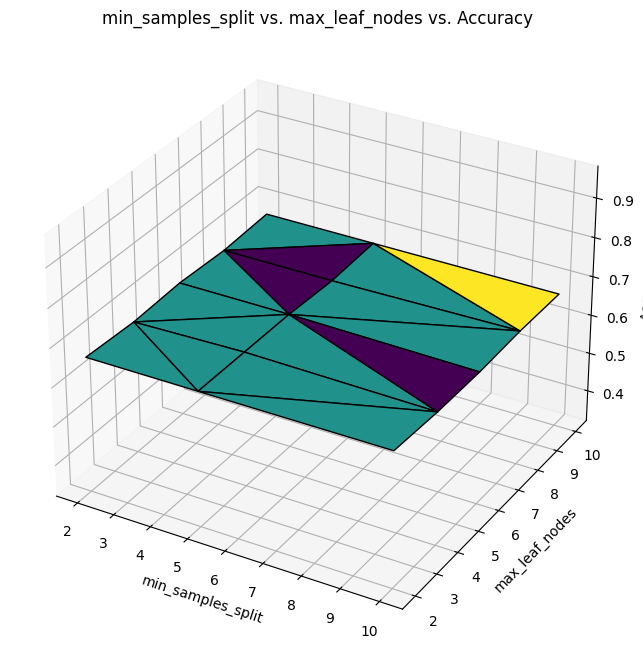

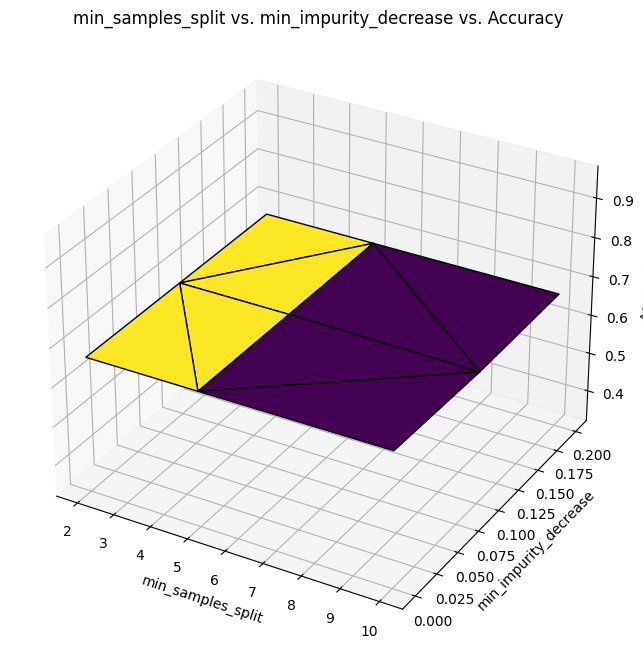

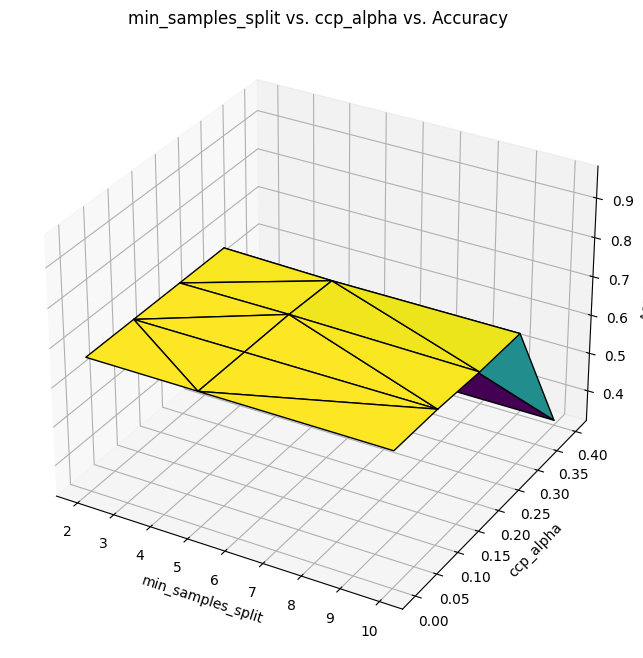

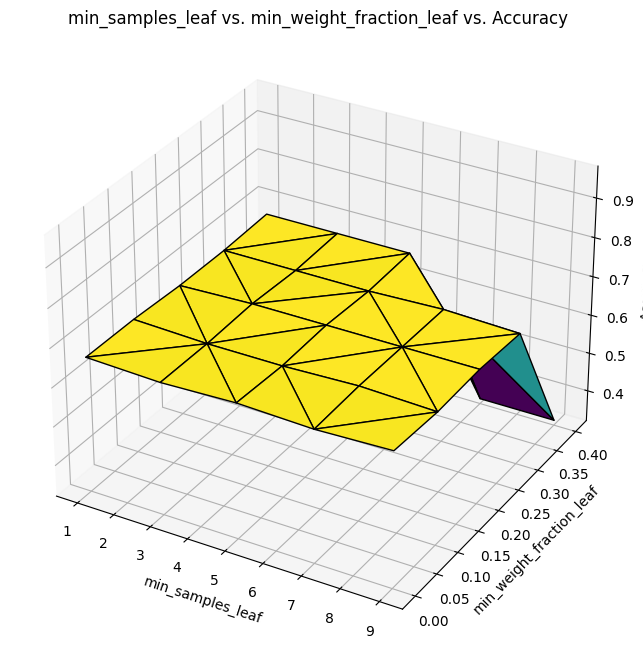

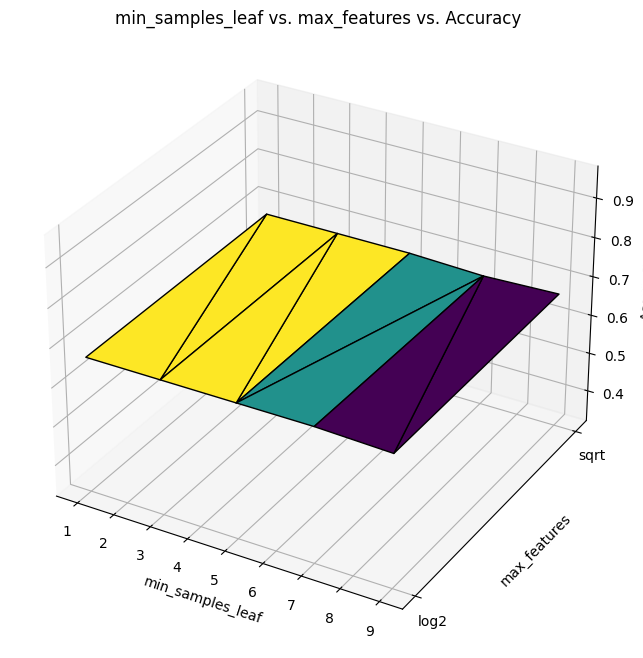

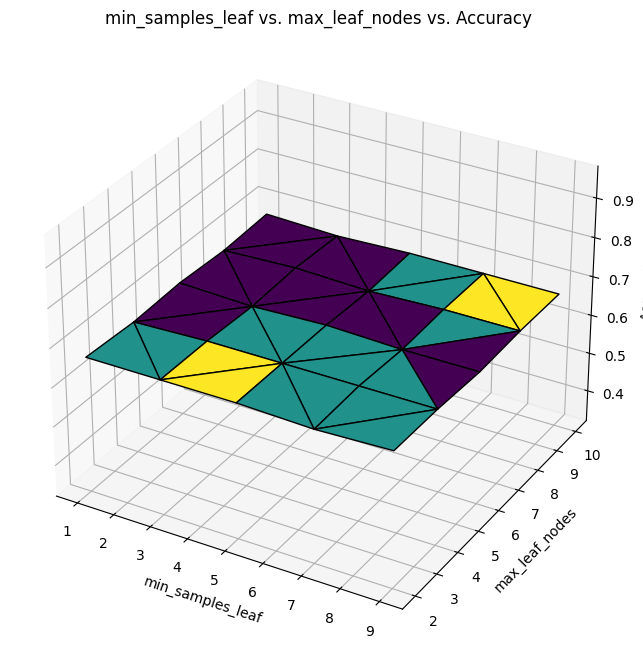

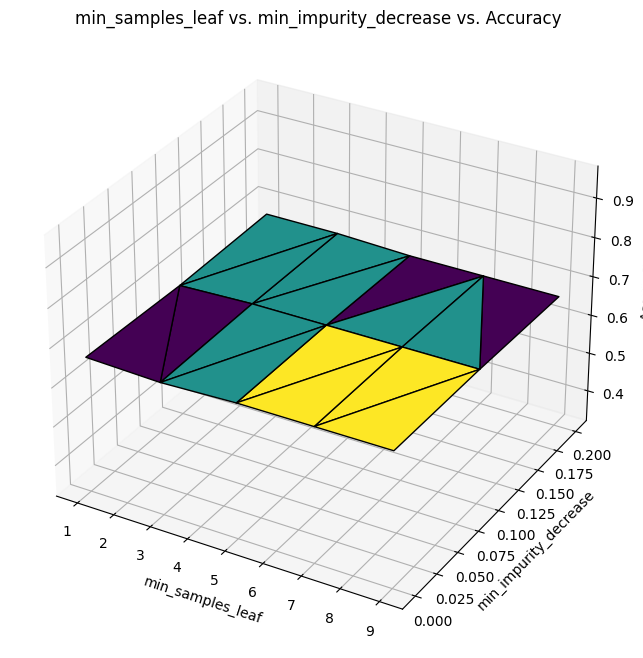

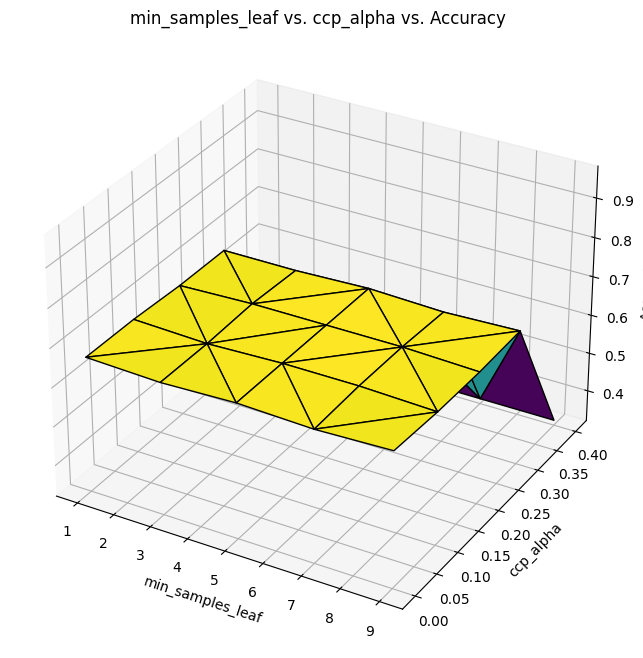

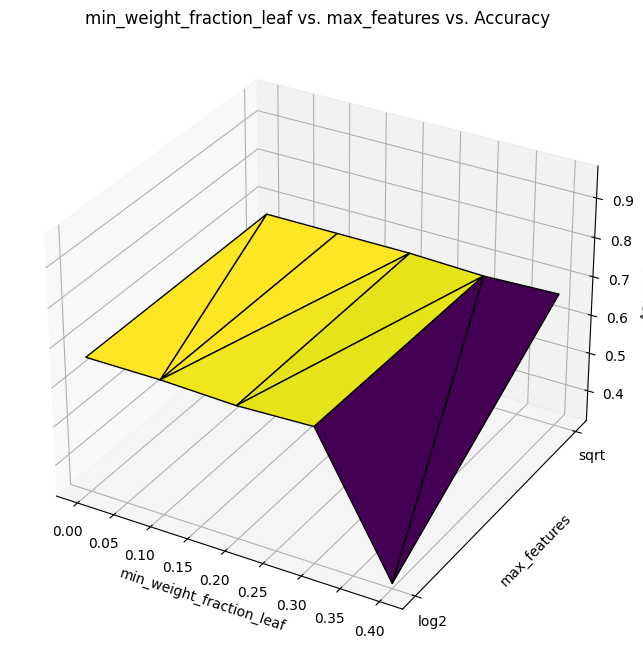

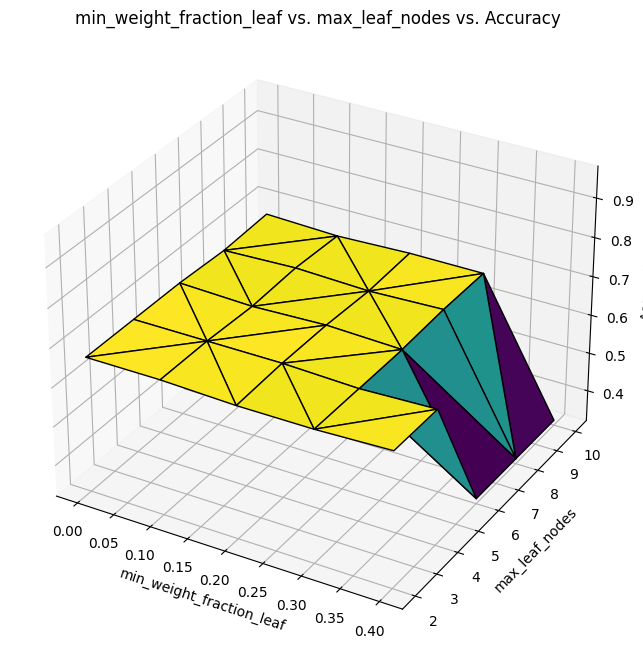

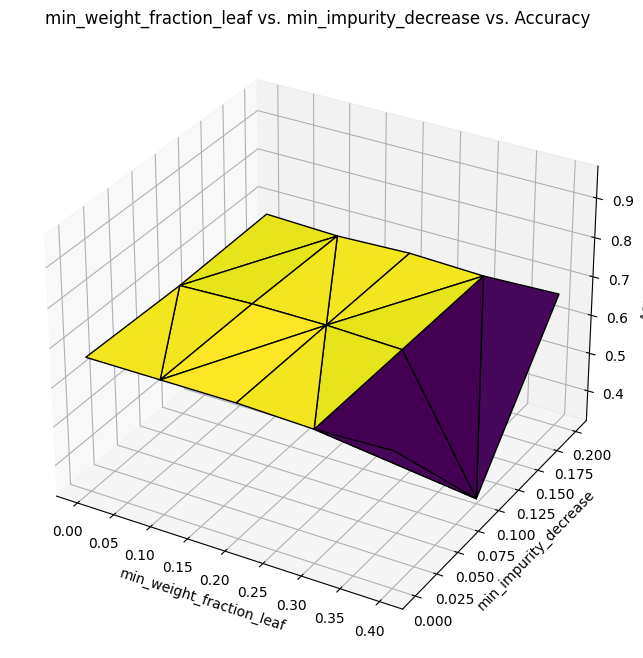

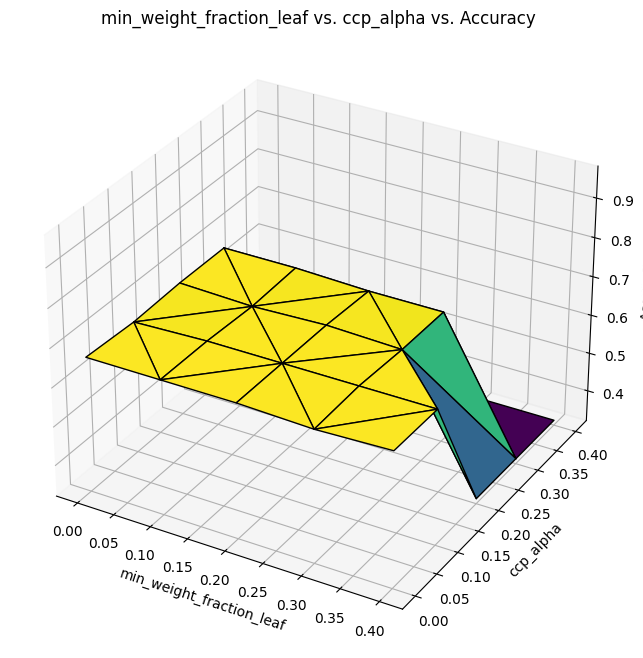

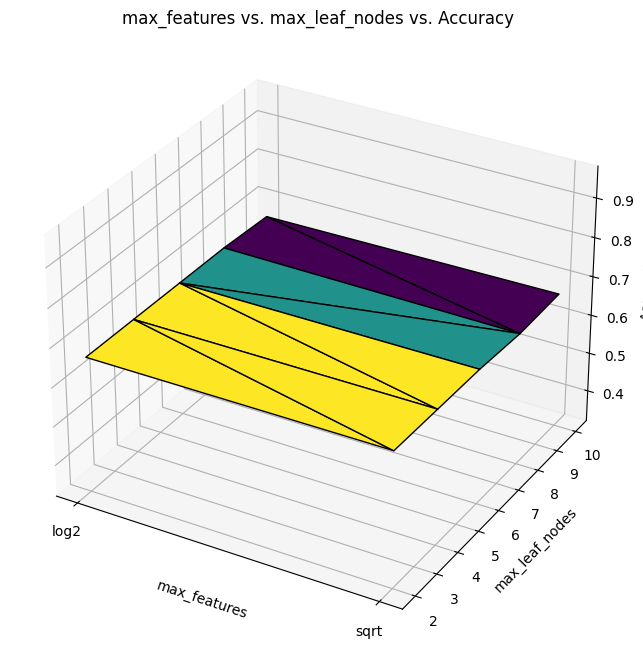

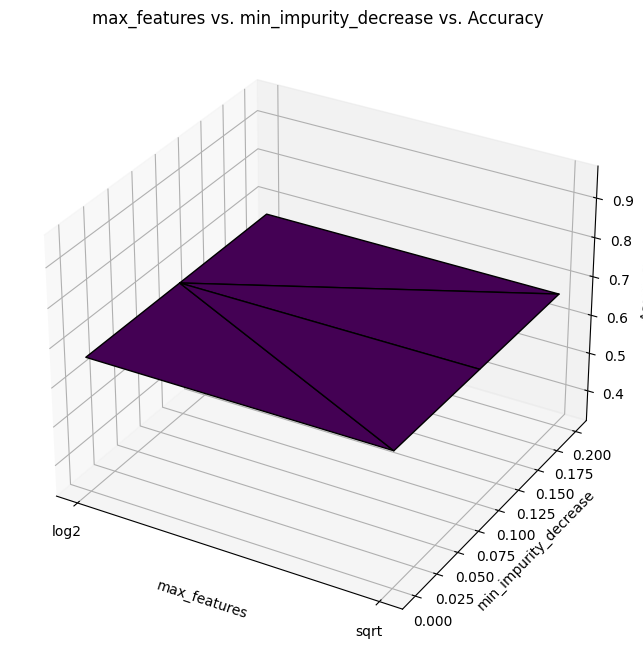

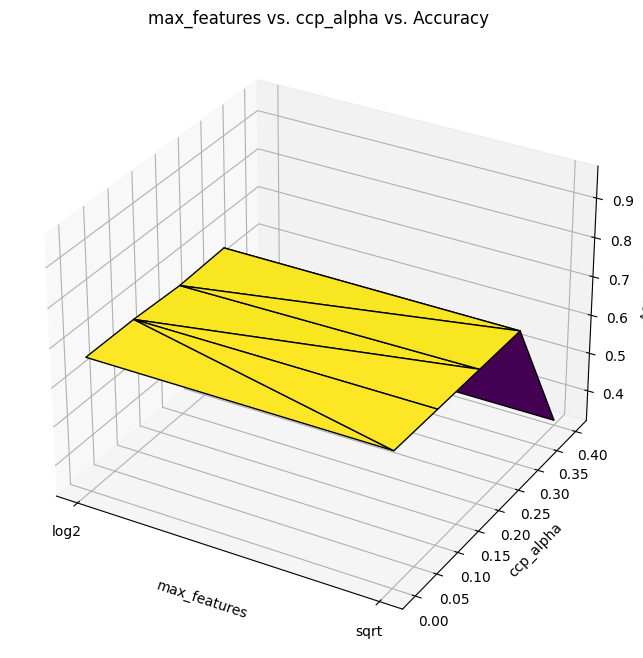

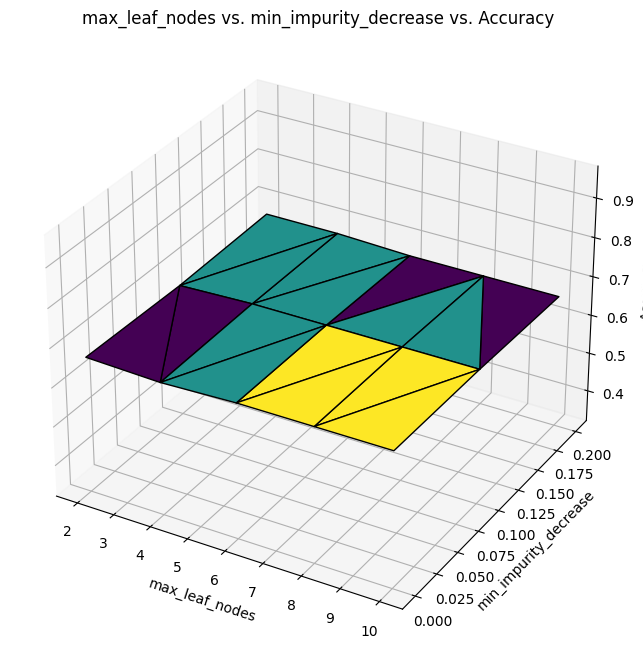

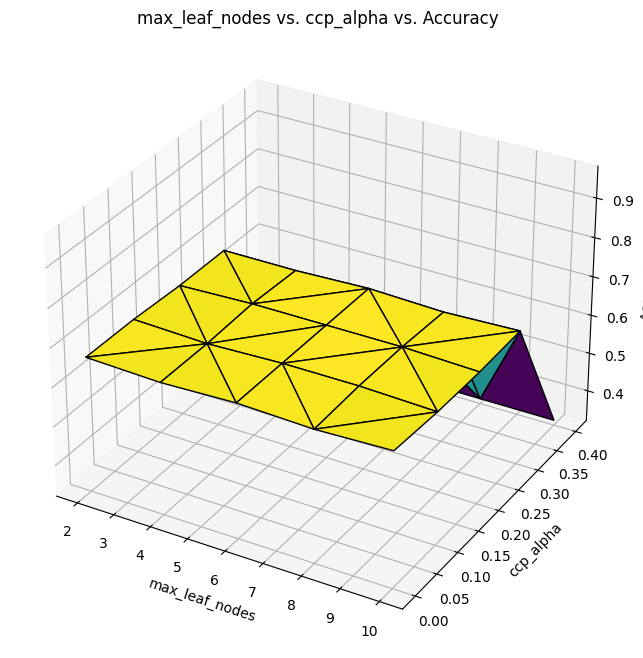

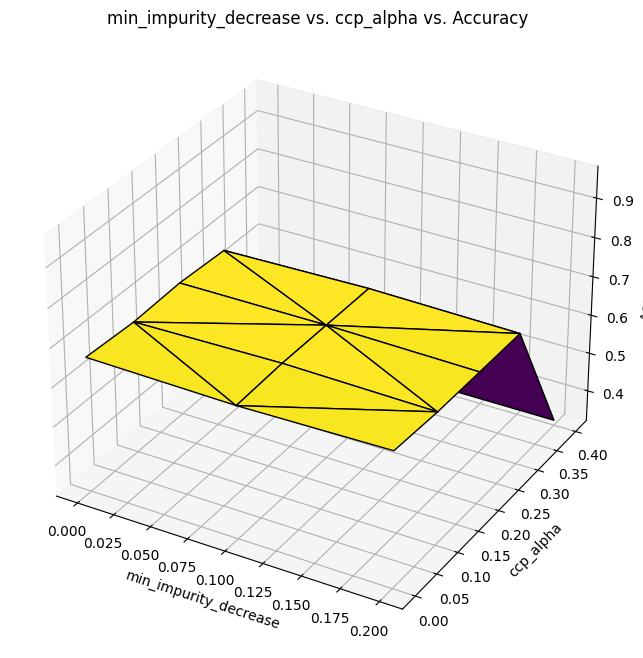

In [116]:
for parameter in parameters:
    subparameters.remove(parameter)
    for parameter_2 in subparameters:
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Prepare the data for the surface plot
        if parameter in categorical_cols:
            x = filtered_df[parameter].cat.codes
            ax.set_xticks(np.unique(x))
            ax.set_xticklabels(filtered_df[parameter].cat.categories)
        else:
            x = filtered_df[parameter].values
            
        if parameter_2 in categorical_cols:
            y = filtered_df[parameter_2].cat.codes
            ax.set_yticks(np.unique(y))
            ax.set_yticklabels(filtered_df[parameter_2].cat.categories)
        else:
            y = filtered_df[parameter_2].values
            
        z = filtered_df['accuracy'].values

        # Create the surface plot
        ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='black')

        # Set the labels and title
        ax.set_xlabel(parameter)
        ax.set_ylabel(parameter_2)
        ax.set_zlabel('Accuracy')
        ax.set_title(f'{parameter} vs. {parameter_2} vs. Accuracy')
        # Show the plot
        plt.show()
